<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">Exploratory Data Analysis (EDA) 🛒</h1></center>

In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
color = sns.color_palette()
sns.set_theme()
%matplotlib inline
plt.style.use("fivethirtyeight")

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Loading the Data</h1>

In [8]:
order_products_train_df = pd.read_csv("order_products__train.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")

In [9]:
order_products_train_df

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [10]:
order_products_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [11]:
order_products_prior_df

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [12]:
order_products_prior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


Both the files `orders_prduct_prior` and ```orders_prduct_train``` seem to have the same columns. Whereas the `orders_prduct_prior` contains over 32.4m rows, the `orders_prduct_train` only contain 1.38m rows. For our project, building a recomennder system, this is irrelevant and, as such, we will merge the two file and explore the merged together.

In [13]:
order_products_df = pd.concat([order_products_prior_df, order_products_train_df])
order_products_df.sort_values("order_id").head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0


In [14]:
order_products_df.sort_values("order_id")

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
...,...,...,...,...
32434483,3421083,35211,5,0
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0


In [15]:
products_per_order = order_products_df.groupby("order_id").count()["product_id"].mean()
print(f"Average number of products per order: {round(products_per_order,2)}")

Average number of products per order: 10.11


In [16]:
orders_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


The orders file contains details about the order such as `order_id`, `user_id` the `order_number` as well as the `day of the week`, the `hour` and the `days since prior order`. Let's check how the orders are distributed. Again, the files also contain infos about the `eval_set` which for our purpose is not relevant.

In [18]:
# checking the average number of orders per user
orders_df.groupby("user_id")["order_id"].nunique().values.mean()

16.590367054784224

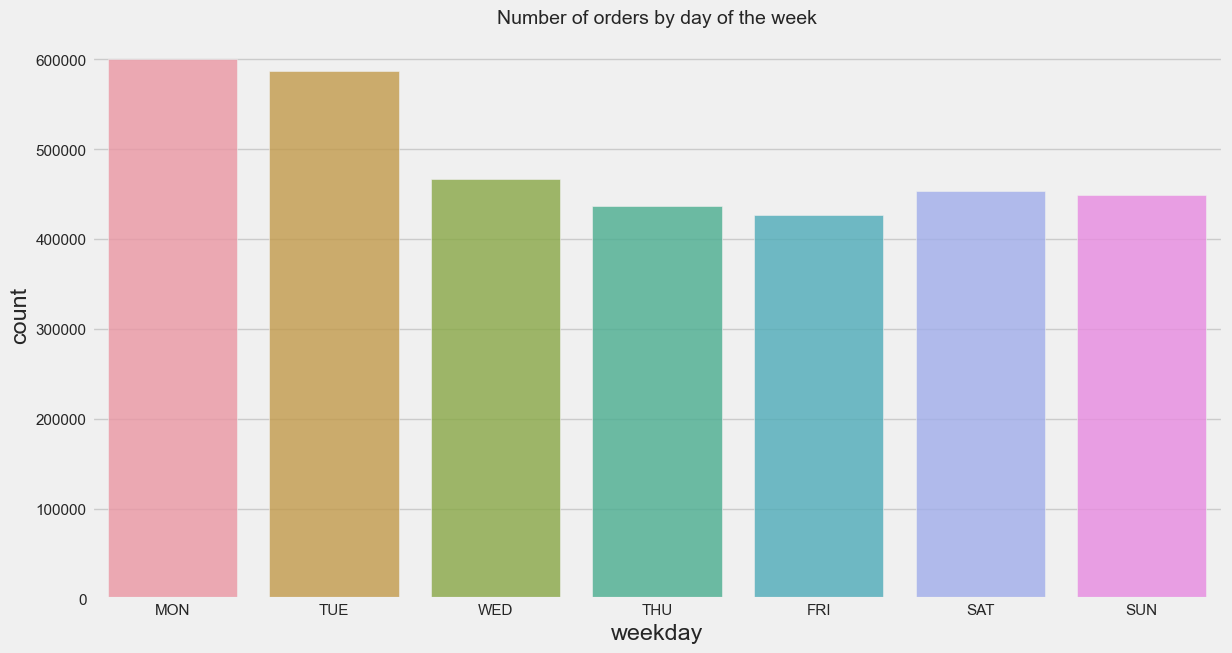

In [19]:
plt.figure(figsize=(13,7))
plt.title("Number of orders by day of the week", fontsize=14)
sns.countplot(x="order_dow", data=orders_df, alpha=0.8)
plt.xticks(ticks= range(0,7),labels=["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"])
plt.xlabel("weekday")
plt.show()


<h5 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">As we can see, Monday and Tuesday there were siginifcantly more orders than the rest of the week. Let's see how this </h5>

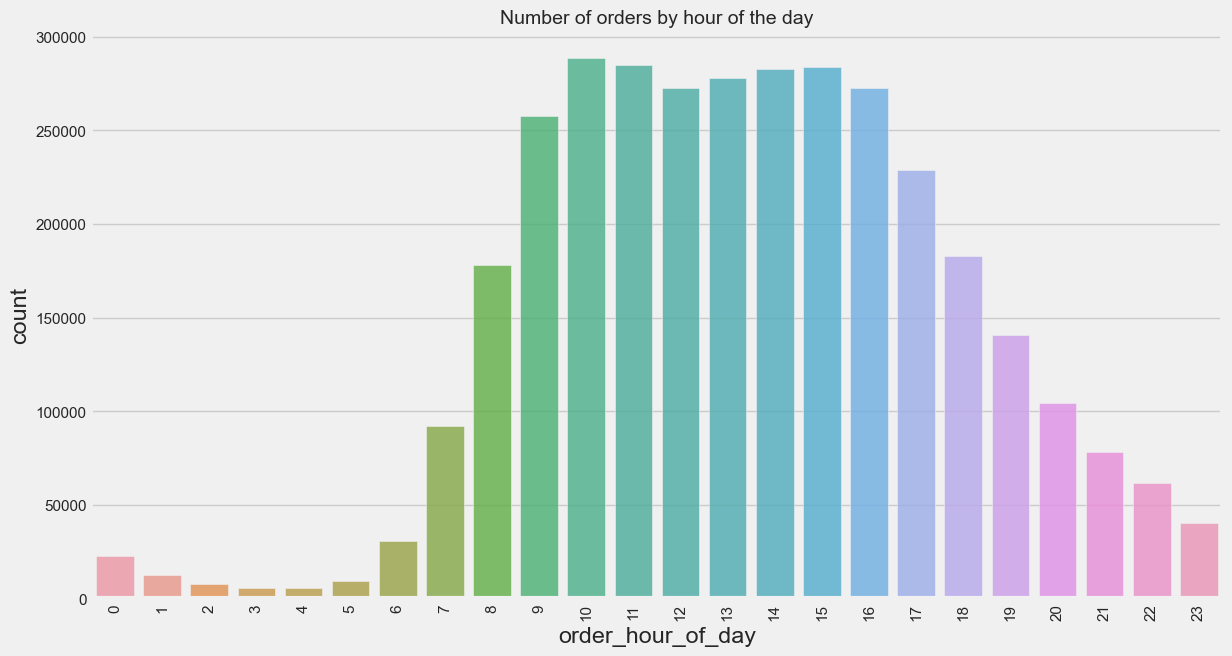

In [20]:
plt.figure(figsize=(13,7))
plt.title("Number of orders by hour of the day", fontsize=14)
sns.countplot(x="order_hour_of_day", data=orders_df, alpha=0.8)
plt.xticks(rotation=90)
plt.show()

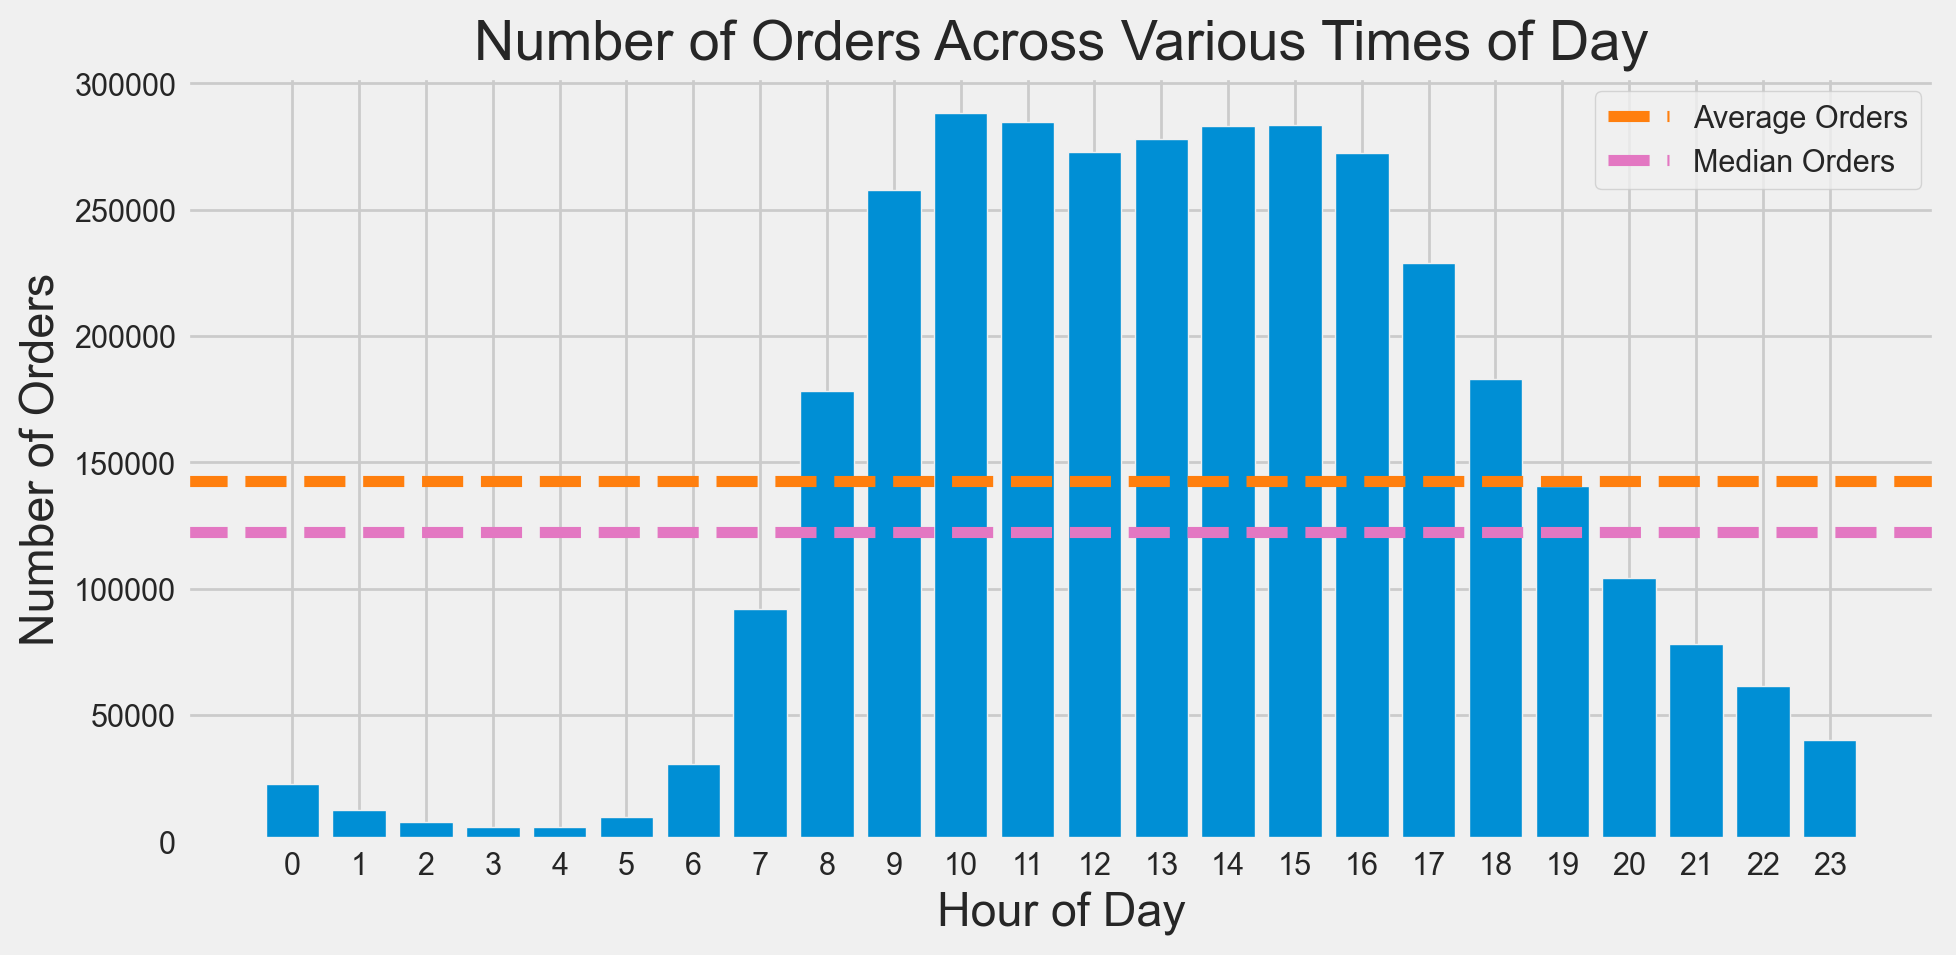

In [21]:
orders_per_hour = orders_df.order_hour_of_day.value_counts()

# Sorting the index to have a sequential x-axis
orders_per_hour = orders_per_hour.sort_index()

# Calculate the average and median
avg_orders = orders_per_hour.values.mean()
median_orders = np.median(orders_per_hour.values)

# Creating the bar chart
plt.figure(figsize=(10, 5), dpi=200)
plt.bar(orders_per_hour.index,orders_per_hour.values)

# Adding the average and median lines
plt.axhline(avg_orders, color='tab:orange',linestyle='--', label='Average Orders')
plt.axhline(median_orders, color='tab:pink',linestyle='--', label='Median Orders')

# Adding titles and labels
plt.title('Number of Orders Across Various Times of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(list(range(24)))  # Ensure all hours are shown on the x-axis
plt.legend()

plt.tight_layout()
plt.show()

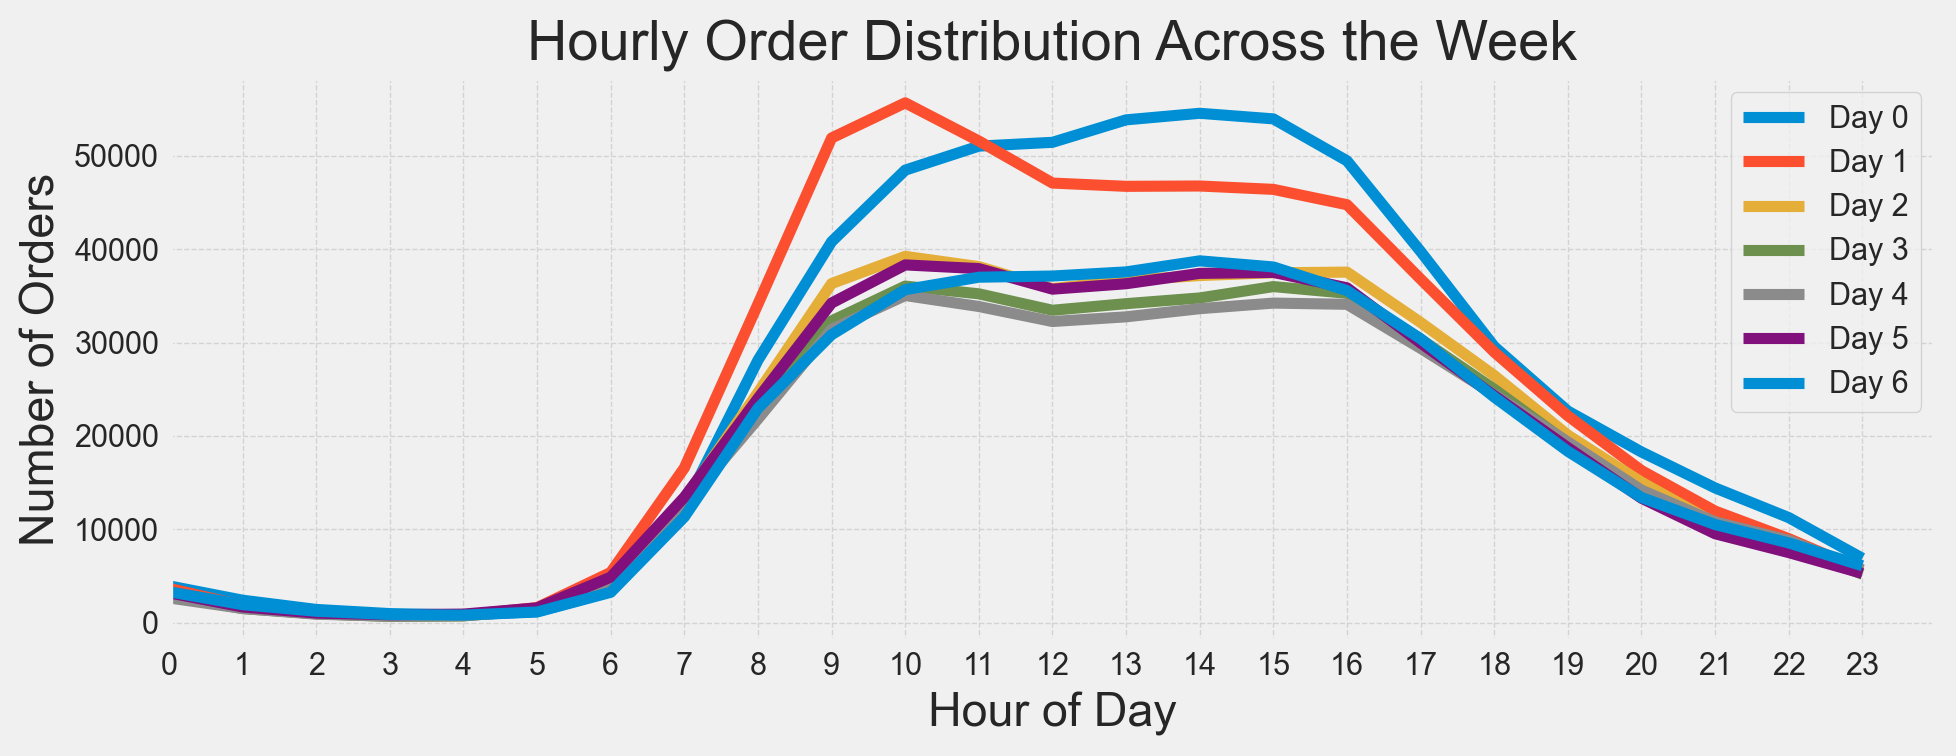

In [22]:
day_hour = orders_df.groupby(['order_dow', 'order_hour_of_day']).order_id.count().reset_index()
day_hour = day_hour.rename(columns={'order_id': 'number_of_orders'})
plt.figure(figsize=(10, 4), dpi=200)

for day in range(7):
    subset = day_hour[day_hour['order_dow'] == day]
    plt.plot(subset['order_hour_of_day'],subset['number_of_orders'], label=f'Day {day}')

plt.title('Hourly Order Distribution Across the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')
plt.xticks(list(range(24)))
plt.xlim(0, 24)
plt.tight_layout()
plt.show()

Key observations:

On days 0 and 1, contrasting trends emerge. On day 1, orders predominantly occur in the morning, between 8:00 and 12:00. In contrast, on day 0, most orders are placed in the afternoon, specifically from 12:00 to 16:00.
Day 6 has similar trend with day 0, however the number of orders are much lower.
The hourly trends for the rest of the week follow a similar pattern: there's a peak from 8:00 to 11:00, a decline between 11:00 and 13:00, followed by a slight uptick at 16:00. After 16:00, the number of orders starts to decrease.
In accordance with the observations above:

Looks like day 0 is Sunday, day 1 is Monday, ..., day 6 is Saturday:
Users order from Sunday afternoon till Monday afternoon more actively compared to the rest of week. Such a behavour might be explained by the desire to stock up on groceries after the weekend.
This also corresponds with the fact that a week in the US starts from Sunday.
Saturday (6) exhibits a trend similar to Sunday (0), but with a significantly lower number of orders. People may engage in housekeeping, rest, or outdoor activities on Saturdays, leading to reduced shopping.
From Tuesday (2) to Friday (5), order volumes remain relatively stable from 9:00 to 16:00, with a slight dip around lunchtime, likely due to people taking lunch breaks and having less time to place orders.

The majority of orders are placed between 8:00 and 19:00, with the highest volume occurring between 10:00 and 16:00. However, there isn't a distinct rush hour. It's natural for grocery orders to be made during the day.

Lokking at the time of the orders we cann see, that most of the orders happend between 09:00 and 17:00.

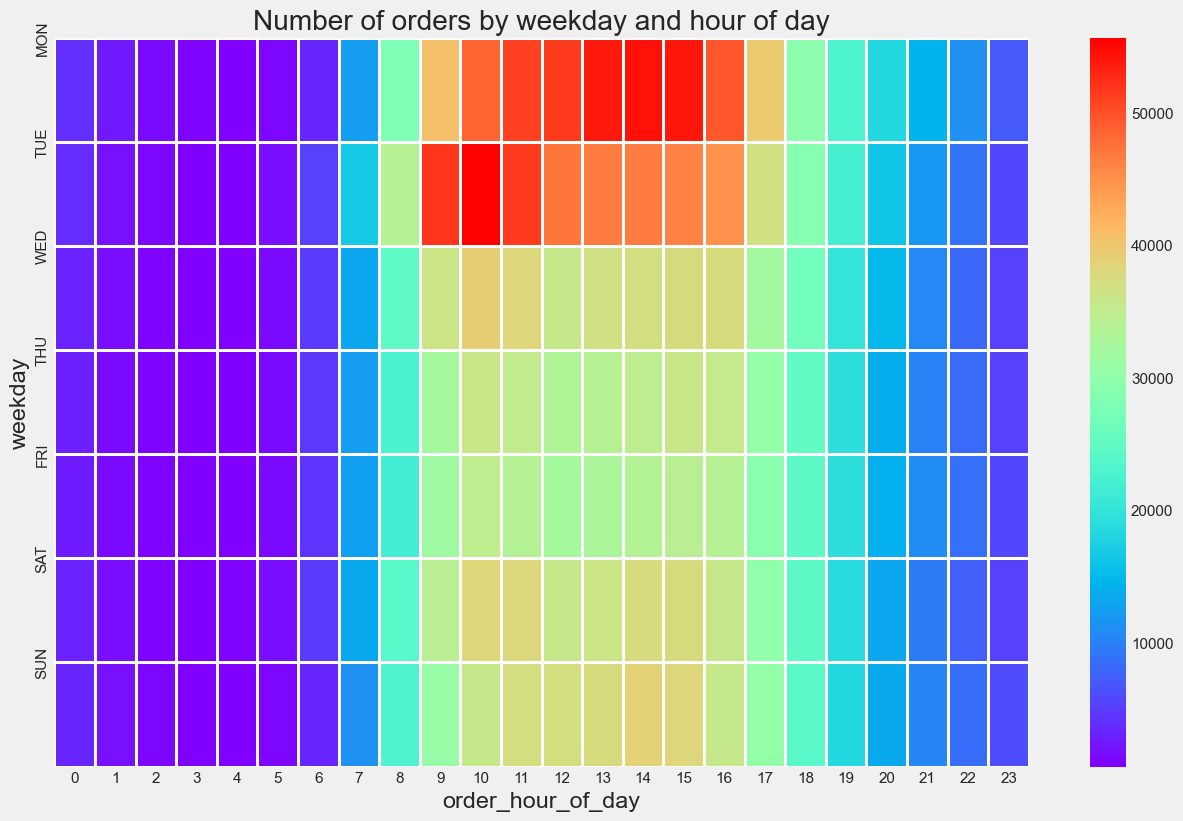

In [23]:
plt.figure(figsize=(14,9))
sns.heatmap(orders_df.groupby(['order_dow', 'order_hour_of_day']).size().unstack(fill_value=0), cmap="rainbow", linewidth=1)
plt.title("Number of orders by weekday and hour of day")
plt.yticks(ticks= range(0,7),labels=["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"])
plt.ylabel("weekday")
plt.show()

As we already could see in the single graphs, we can see in the heatmap above more clearly. The most orders happend on Monday between 10:00 and 16:00 and on Tuesday beteen 09:00 and 13:00

In [24]:
products_df

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [25]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


There are a total of 49688 unique products. Let's explore how these products are distributed with regard to the departments and aisles. As The original products dataframe only containts department_ids and aisles_ids, let's first extend the df with the additional, qualitative information form the other dataframes

In [26]:
extended_products_df = products_df.merge(departments_df, on="department_id")
extended_products_df = extended_products_df.merge(aisles_df, on="aisle_id")

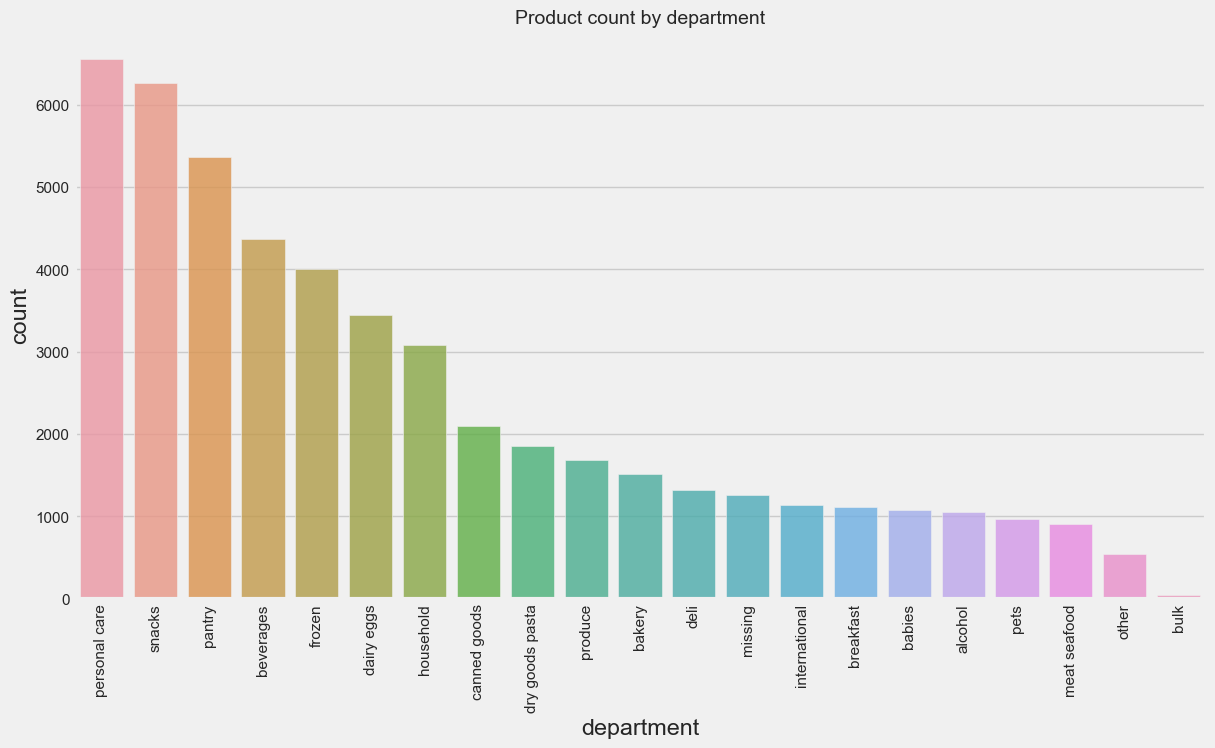

In [27]:
plt.figure(figsize=(13,7))
plt.title("Product count by department", fontsize=14)
sns.countplot(x="department", data=extended_products_df, order=extended_products_df.department.value_counts().index, alpha=0.8)
plt.xticks(rotation=90)
plt.show()

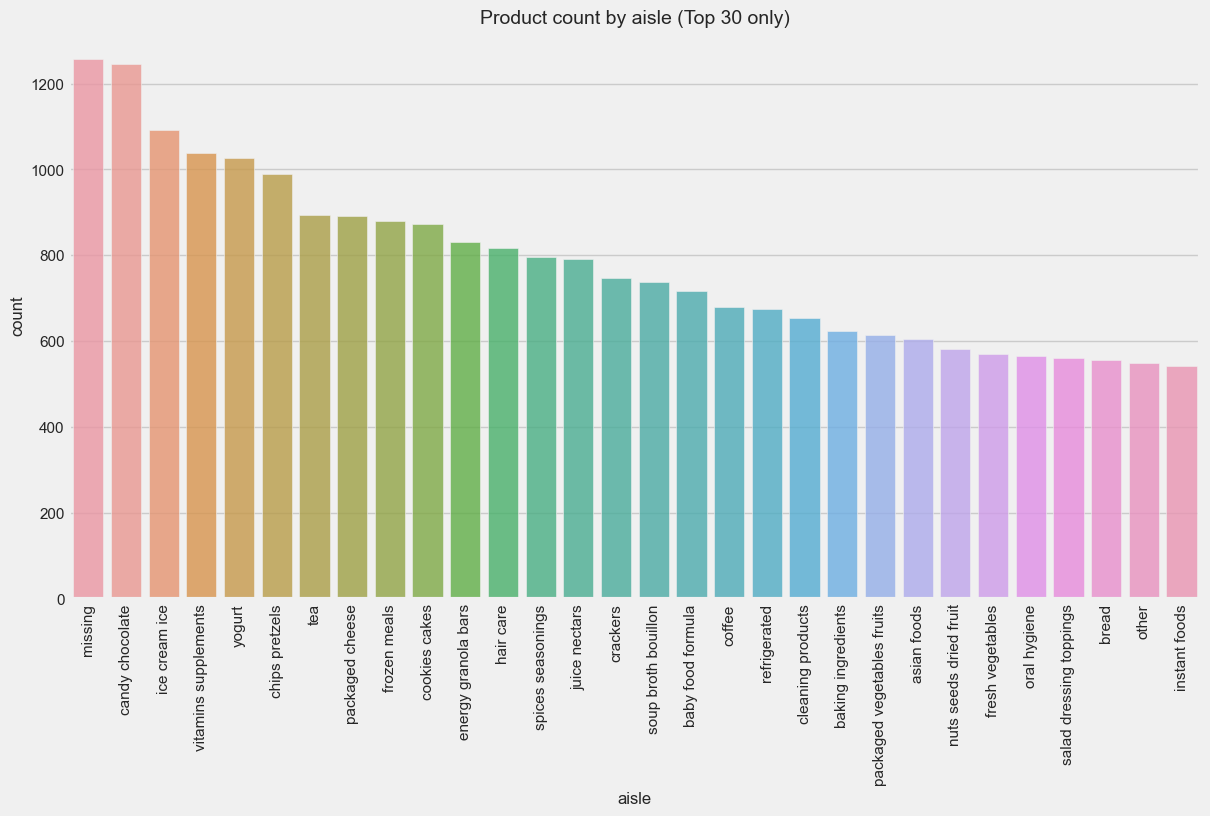

In [28]:
cnt_srs = extended_products_df["aisle"].value_counts().head(30)
plt.figure(figsize=(13,7))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.title("Product count by aisle (Top 30 only)", fontsize=14)
plt.ylabel("count", fontsize=12)
plt.xlabel('aisle', fontsize=12)
plt.xticks(rotation=90)
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Aisles</h1>

In [29]:
aisles_df

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [30]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


There are a total of 135 different aisles

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Departments</h1>

In [31]:
departments_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [32]:
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


There are a total of 21 departments

## 1.3 All orders

So far we looked at the single files and merged very few. In order to be able to explore the data in more depth, we need to merge our files together. We will also use this merged dataframe later for our modelling, as it containts all required information to solve our business problem

In [33]:
# Merging all the relevant files to create one big dataframe
all_orders = pd.concat([order_products_prior_df,order_products_train_df])
all_orders = all_orders.merge(orders_df[['order_id','user_id']], on='order_id', how='inner')
all_orders = all_orders.merge(products_df, on = 'product_id', how='inner')
all_orders = all_orders.merge(departments_df, on = 'department_id', how='inner')
all_orders = all_orders.merge(aisles_df, on = 'aisle_id', how='inner')
all_orders

,order_id,product_id,add_to_cart_order,reordered,user_id,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,202279,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,202279,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,202279,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,202279,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,202279,Natural Sweetener,17,13,pantry,baking ingredients
...,...,...,...,...,...,...,...,...,...,...
33819101,3421063,14233,3,1,169679,Natural Artesian Water,115,7,beverages,water seltzer sparkling water
33819102,3421063,35548,4,1,169679,Twice Baked Potatoes,13,20,deli,prepared meals
33819103,3421070,35951,1,1,139822,Organic Unsweetened Almond Milk,91,16,dairy eggs,soy lactosefree
33819104,3421070,16953,2,1,139822,Creamy Peanut Butter,88,13,pantry,spreads


In [34]:
all_orders.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
user_id              0
product_name         0
aisle_id             0
department_id        0
department           0
aisle                0
dtype: int64

In [35]:
all_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 10 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  int64 
 3   reordered          int64 
 4   user_id            int64 
 5   product_name       object
 6   aisle_id           int64 
 7   department_id      int64 
 8   department         object
 9   aisle              object
dtypes: int64(7), object(3)
memory usage: 2.5+ GB


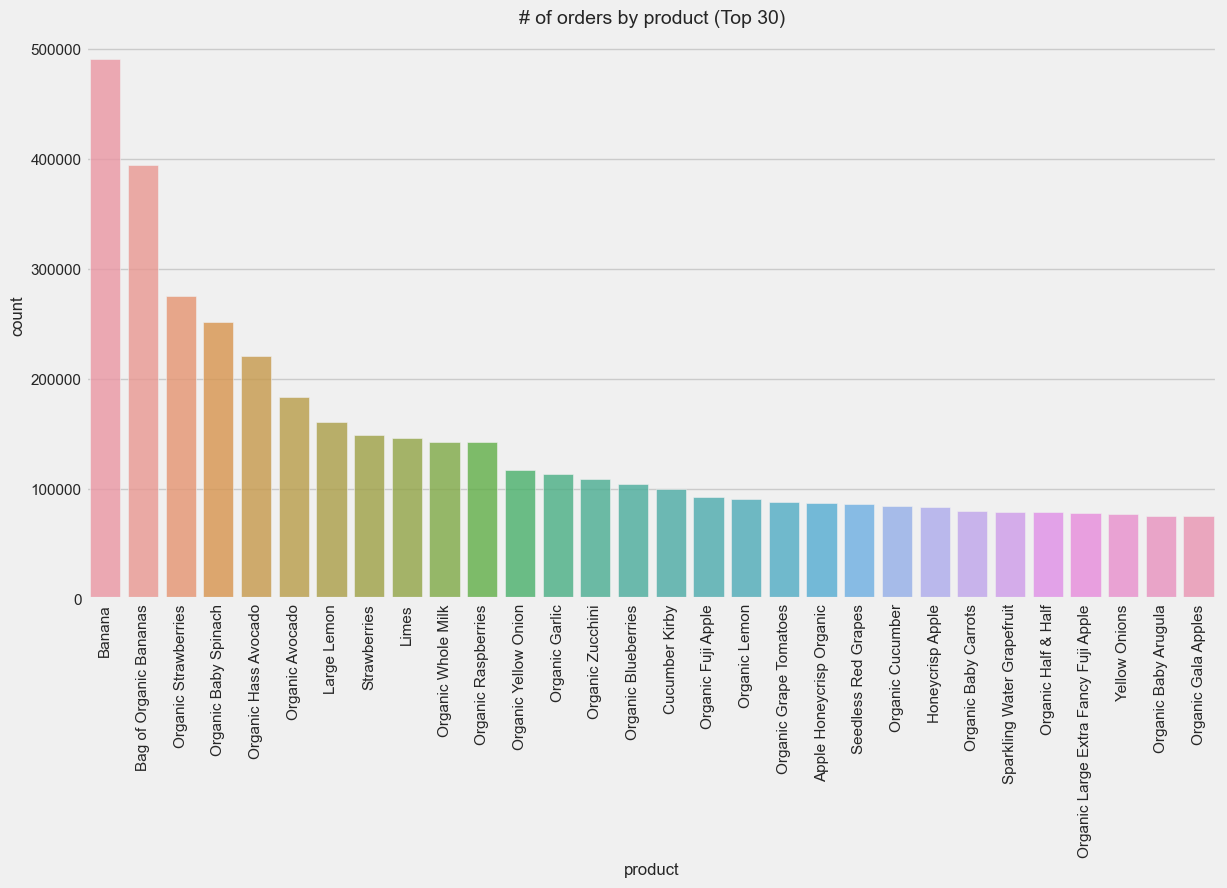

In [36]:
cnt_srs = all_orders["product_name"].value_counts().head(30)
plt.figure(figsize=(13,7))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.title("# of orders by product (Top 30)", fontsize=14)
plt.ylabel("count", fontsize=12)
plt.xlabel('product', fontsize=12)
plt.xticks(rotation=90)
plt.show()

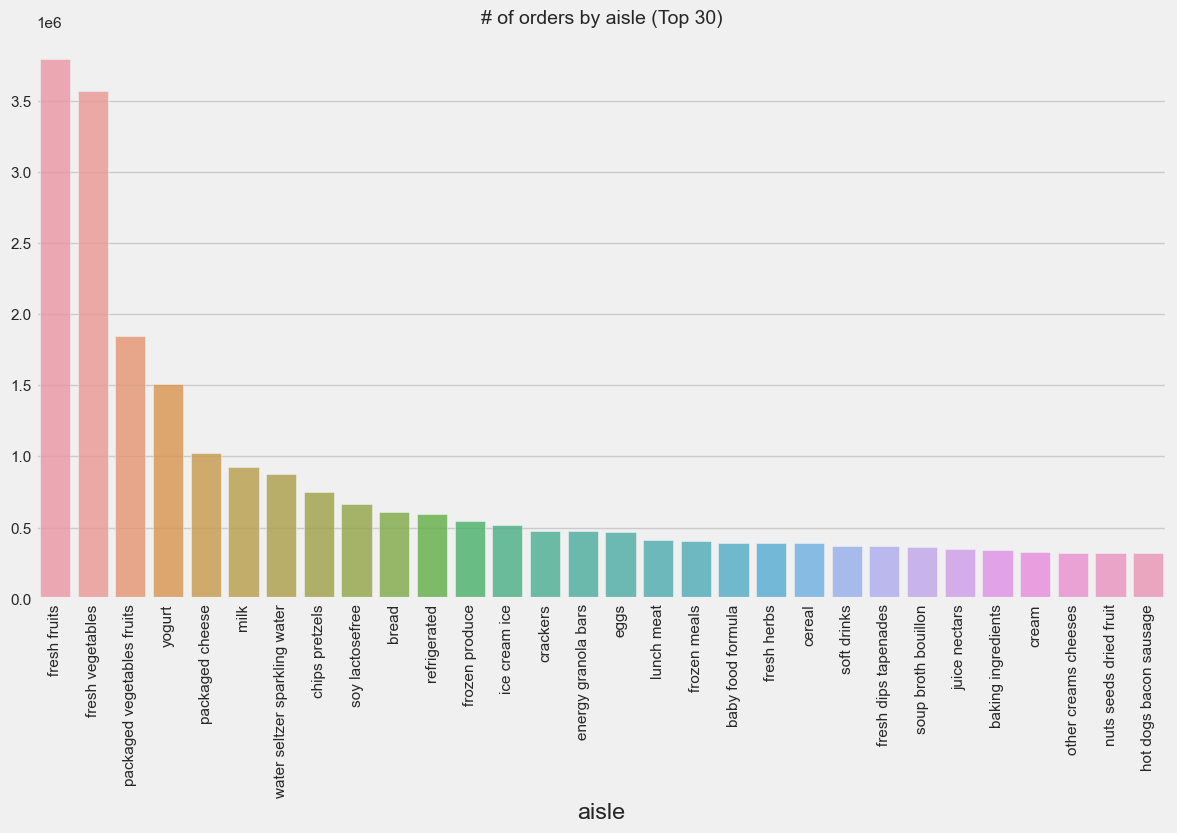

In [37]:
cnt_srs = all_orders["aisle"].value_counts().head(30)
plt.figure(figsize=(13,7))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.title("# of orders by aisle (Top 30)", fontsize=14)
plt.xticks(rotation=90)
plt.show()

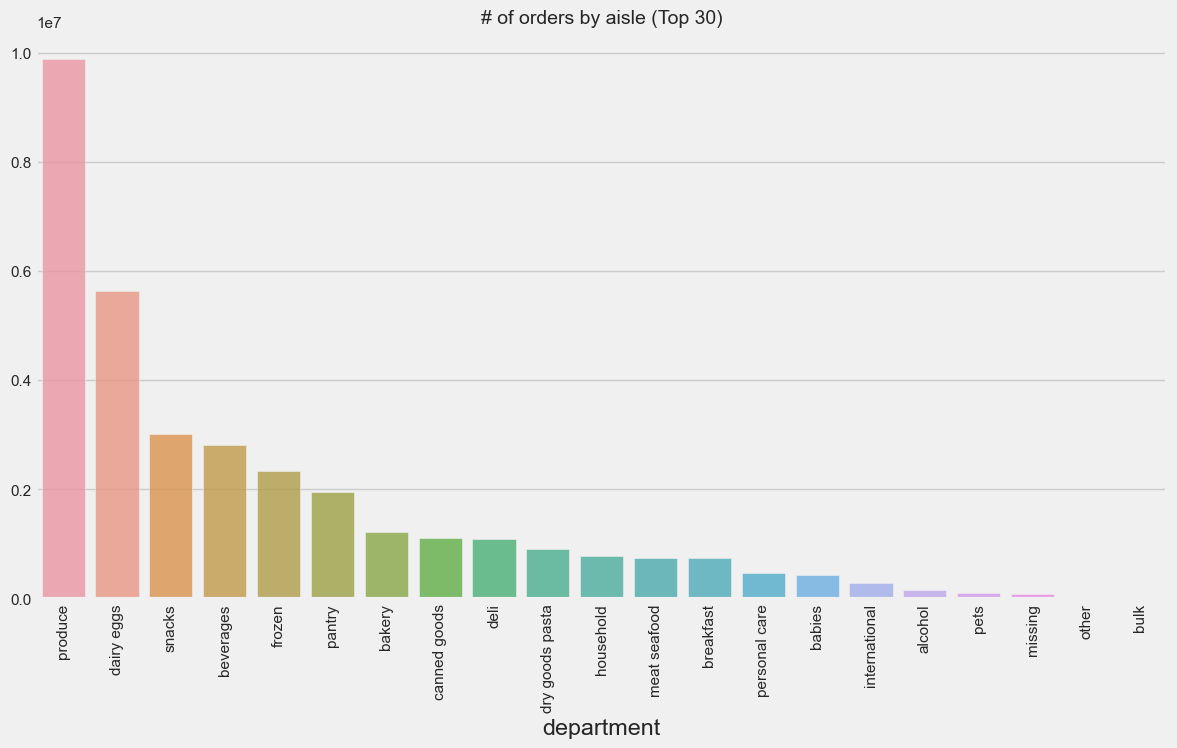

In [38]:
cnt_srs = all_orders["department"].value_counts().head(30)
plt.figure(figsize=(13,7))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.title("# of orders by aisle (Top 30)", fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [39]:
fig = px.treemap(all_orders,
                path=['department', 'aisle'],
                values='order_id',
                color='department',
                width=980, height=700,
                title="Instacard Treemap")

fig.show()

C:\Users\user\AppData\Local\Temp\ipykernel_21840\3587030093.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_orders.groupby("user_id")["order_id"].nunique())
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


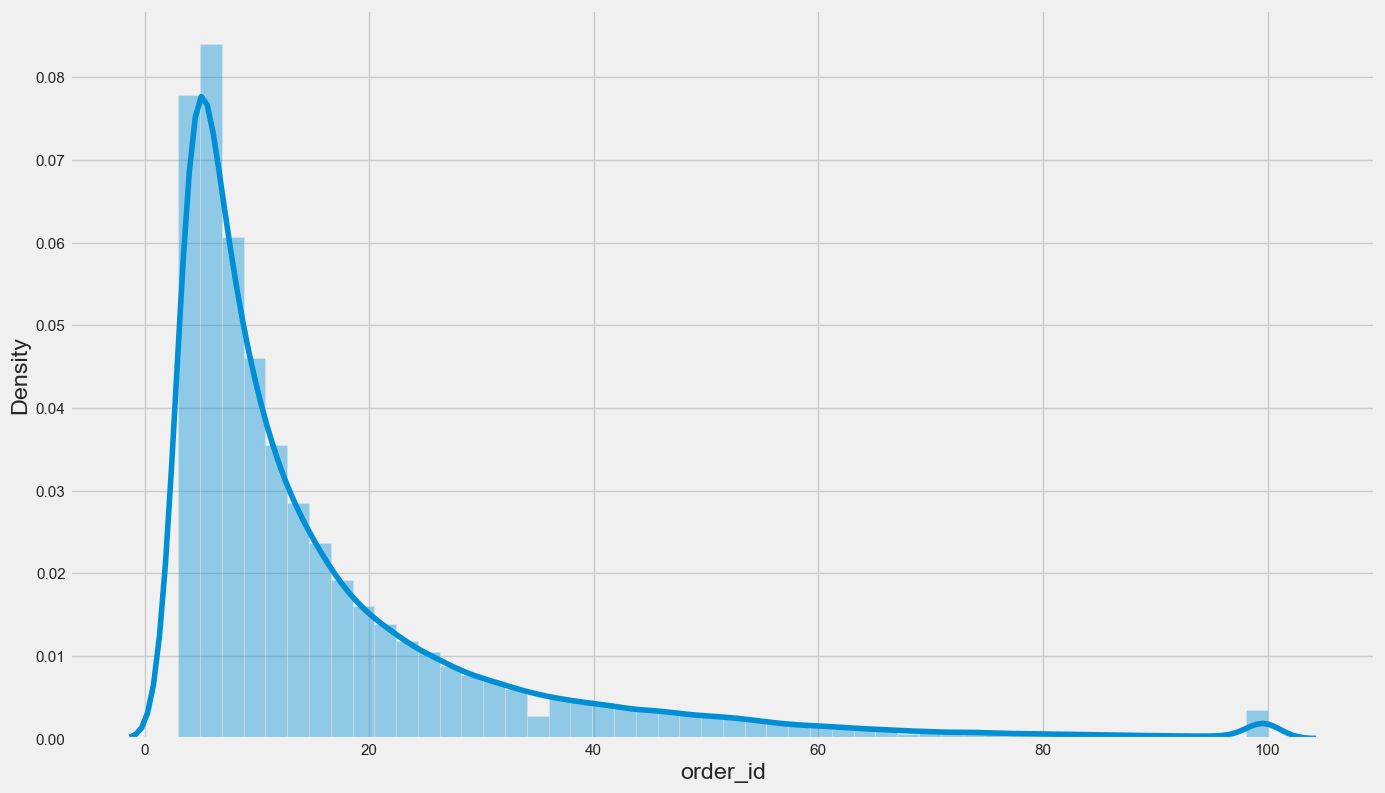

In [ ]:
plt.figure(figsize=(15,9))
sns.distplot(all_orders.groupby("user_id")["order_id"].nunique())
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


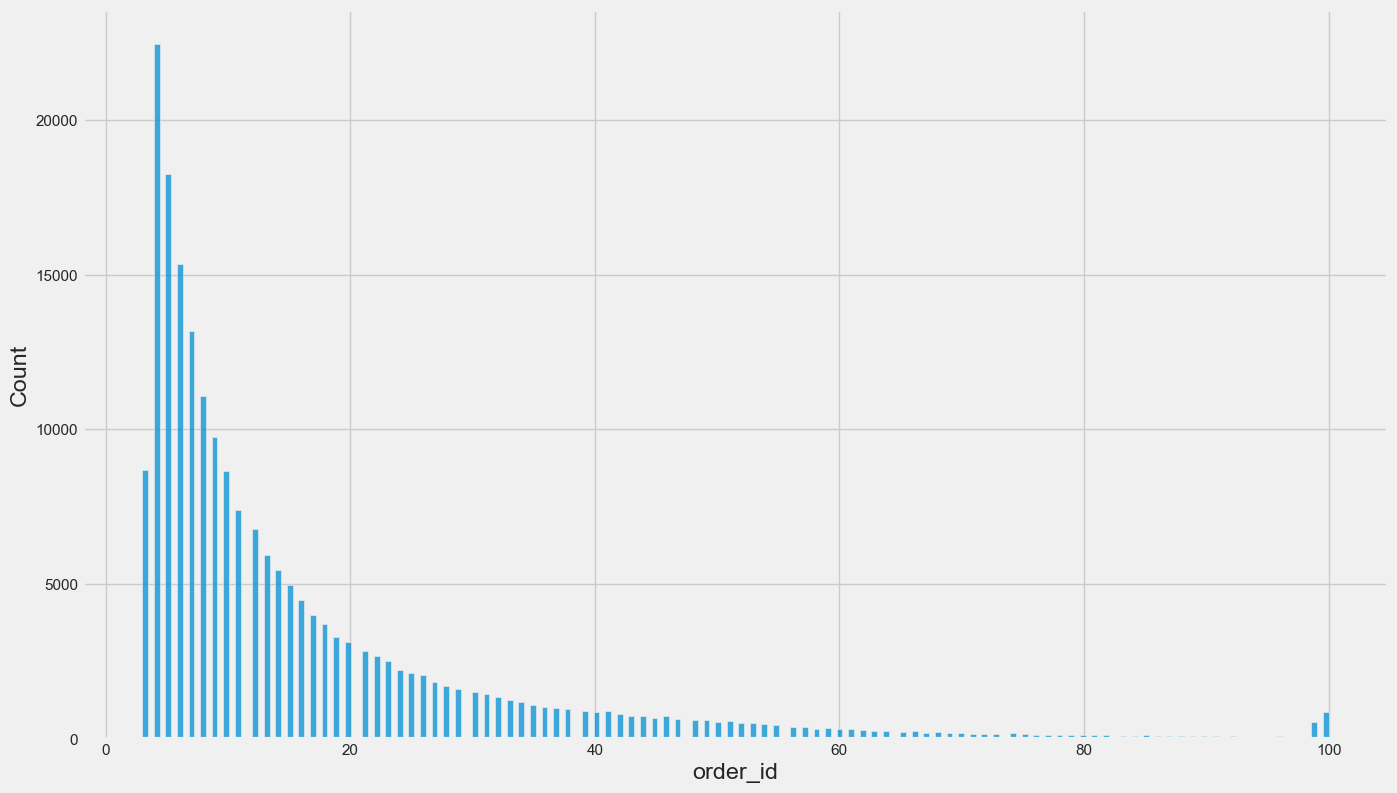

In [ ]:
plt.figure(figsize=(15, 9))
sns.histplot(all_orders.groupby("user_id")["order_id"].nunique())
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_21840\2821983026.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(orders_df.groupby('user_id')['days_since_prior_order'].mean())
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='days_since_prior_order', ylabel='Density'>

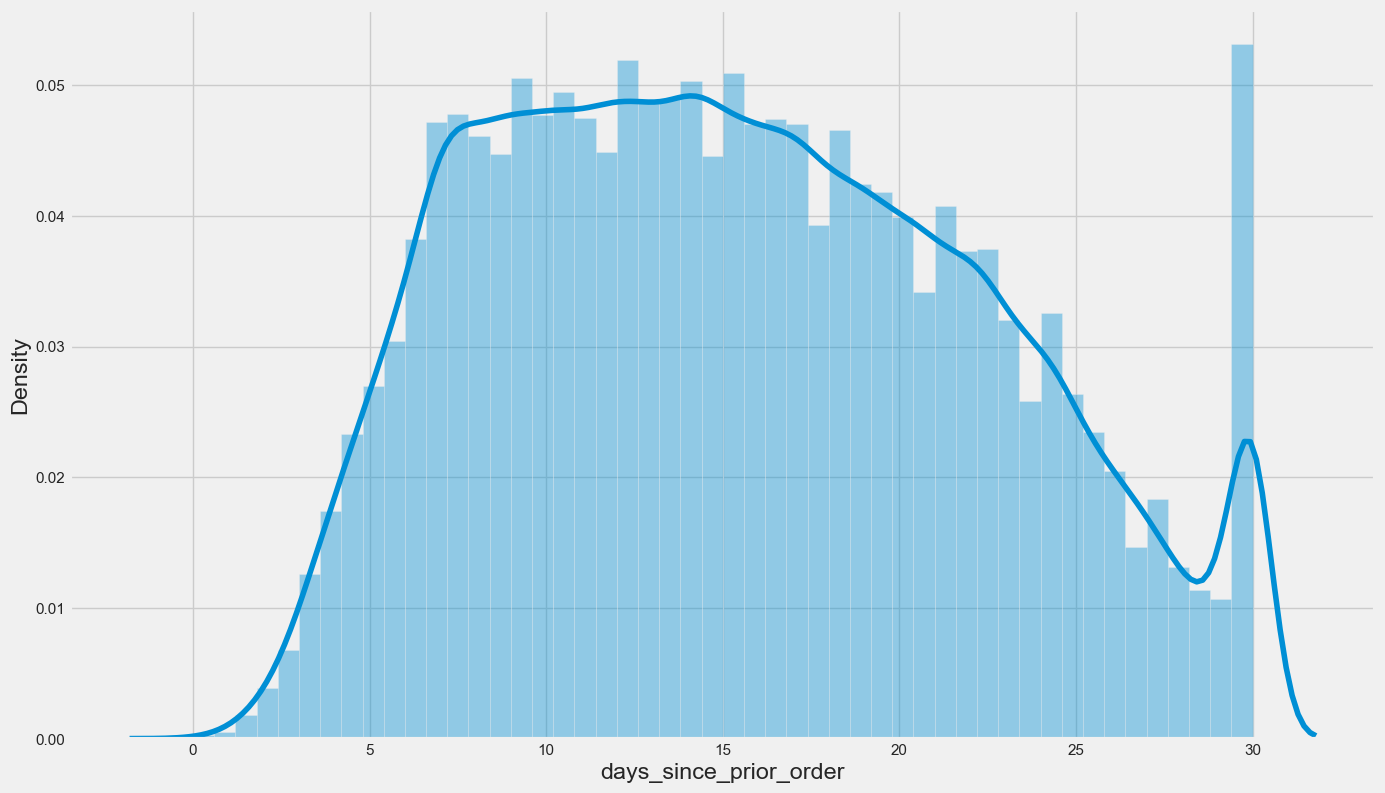

In [ ]:
plt.figure(figsize=(15,9))
sns.distplot(orders_df.groupby('user_id')['days_since_prior_order'].mean())